In [1]:
import networkx as nx

In [2]:
alice = nx.Graph()
alice.add_edge('Alice','Rabbit')
alice.add_edge('Alice','Cat')
alice.add_edge('Alice','Queen')
alice.add_edge('Alice','Caterpillar')
alice.add_edge('Alice','Hatter')
alice.add_edge('Alice','Hare')
alice.add_edge('Rabbit','Queen')
alice.add_edge('Hatter','Dormouse')
alice.add_edge('Hatter','Hare')
alice.add_edge('Hare','Dormouse')

In [3]:
print(nx.info(alice))

Graph with 8 nodes and 10 edges


In [5]:
# degree to which any node is linked ot each other (if all linekd to each other then 1, in ours not all are linekd)
nx.average_clustering(alice)

0.5583333333333333

In [8]:
# shortest path typically through Alice at center
nx.shortest_path(alice, 'Caterpillar', 'Queen')

['Caterpillar', 'Alice', 'Queen']

In [9]:
# exploring betweenness centrality - how likely others will pass through you
nx.betweenness_centrality(alice)

{'Alice': 0.8095238095238095,
 'Rabbit': 0.0,
 'Cat': 0.0,
 'Queen': 0.0,
 'Caterpillar': 0.0,
 'Hatter': 0.11904761904761904,
 'Hare': 0.11904761904761904,
 'Dormouse': 0.0}

In [10]:
# degree centrality is how many links you have compared to how many you could
#alice is only not connected to the dormouse
nx.degree_centrality(alice)

{'Alice': 0.8571428571428571,
 'Rabbit': 0.2857142857142857,
 'Cat': 0.14285714285714285,
 'Queen': 0.2857142857142857,
 'Caterpillar': 0.14285714285714285,
 'Hatter': 0.42857142857142855,
 'Hare': 0.42857142857142855,
 'Dormouse': 0.2857142857142857}

In [11]:
# how many (not just shortest) in total lead to this person/object - useful for larger networks
nx.eigenvector_centrality(alice)

{'Alice': 0.5846811201418213,
 'Rabbit': 0.28446399651173543,
 'Cat': 0.19136106871442413,
 'Queen': 0.28446399651173543,
 'Caterpillar': 0.19136106871442413,
 'Hatter': 0.4173875569134634,
 'Hare': 0.4173875569134634,
 'Dormouse': 0.2732134596893346}

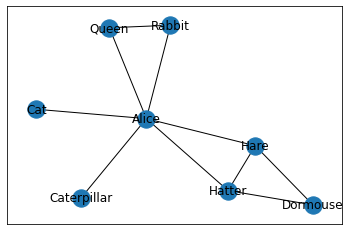

In [13]:
# plenty of lbraries available to make thsi prettier that are not nx - convenient for checking
nx.draw_networkx(alice)

In [18]:
# we can make a directional graph
bb = nx.DiGraph()
bb.add_edge('Walter','Emelio')
bb.add_edge('Walter','Krazy-8')
bb.add_edge('Walter','Jack')
bb.add_edge('Walter','Walter')
bb.add_edge('Tuco','No-Doze')
bb.add_edge('Hank','Tuco')
bb.add_edge('Jesse','Joaquin')
bb.add_edge('Jack','Hank')

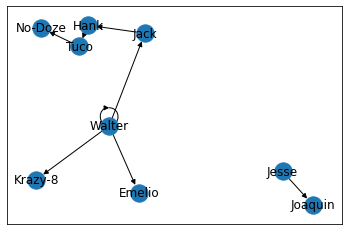

In [21]:
# spring layout spaces things out
nx.spring_layout(bb)
nx.draw_networkx(bb)

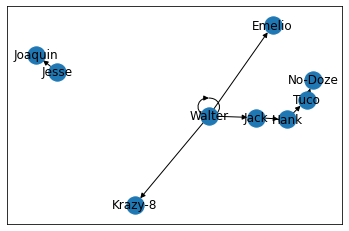

In [22]:
#Now add weights and relations (how this is related to that)
bb = nx.DiGraph()
bb.add_edge('Walter','Emelio', relation='poisoned')
bb.add_edge('Walter','Krazy-8', relation='strangled')
bb.add_edge('Walter','Jack', relation='shot')
bb.add_edge('Walter','Walter', relation='shot')
bb.add_edge('Tuco','No-Doze', relation='punched')
bb.add_edge('Hank','Tuco', relation='shot')
bb.add_edge('Jesse','Joaquin', relation='shot')
bb.add_edge('Jack','Hank', relation='shot')

nx.spring_layout(bb)
nx.draw_networkx(bb)

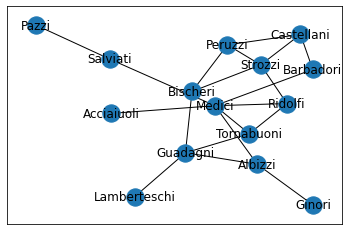

In [25]:
import networkx as nx

#networkx has built-in demo graphs
graph = nx.florentine_families_graph()
nx.draw_networkx(graph)

In [26]:
# new lesson 6.3
import tarfile
import urllib.request as urllib

In [29]:
# get a network from SNAP and store it int he same folder as this notebook
url = 'https://snap.stanford.edu/data/facebook.tar.gz'
stream = urllib.urlopen(url)
archive = tarfile.open(fileobj=stream, mode='r|gz')
archive.extractall()

In [32]:
fn = 'facebook/0.edges'
open(fn).readlines()[:15]

['236 186\n',
 '122 285\n',
 '24 346\n',
 '271 304\n',
 '176 9\n',
 '130 329\n',
 '204 213\n',
 '252 332\n',
 '82 65\n',
 '276 26\n',
 '280 272\n',
 '211 199\n',
 '84 236\n',
 '133 62\n',
 '239 172\n']

In [33]:
# handy function for loading edges
graph = nx.read_edgelist(fn)

In [34]:
print(nx.info(graph))

Graph with 333 nodes and 2519 edges


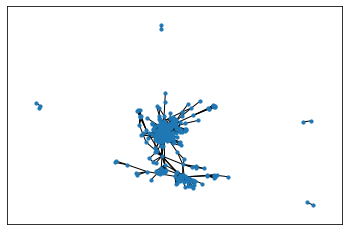

In [40]:
# note that the ego node like our Alice node above is excluded otherwise everything would link to it.  
# In this case, the person whose network this is.
nx.draw_networkx(graph, with_labels=False, node_size=10)
# we can see little groups that do not know any of the bigger group members

In [41]:
# grabbing a zip this time
from zipfile import ZipFile
from io import BytesIO
#Let's get a new file


In [45]:
#this time we are not extracting to our folder, using the files directly via cache
url = 'http://www-personal.umich.edu/~mejn/netdata/football.zip'

with urllib.urlopen(url) as stream:
    with ZipFile(BytesIO(stream.read())) as archive:
        archive.printdir()
        txt = archive.read('football.txt').decode()
        gml = archive.read('football.gml').decode()

File Name                                             Modified             Size
football.gml                                   2014-09-21 14:40:14        33379
football.txt                                   2014-09-21 14:42:28          777


In [46]:
# gml = Graph Markup Language - this includes nodes and edges
# this one shows games played between teams
print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



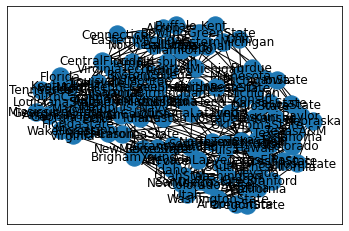

In [47]:
graph = nx.parse_gml(gml)
nx.draw_networkx(graph)

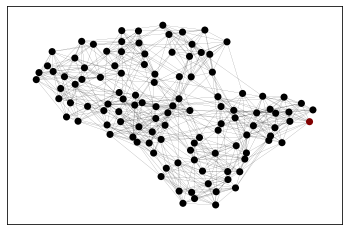

In [51]:
# add options to make it readable (and pass options in a clean way)

# also paint all black except ASU
colors = ['black' for node in graph]
colors[8] = 'maroon'

# could normally pass one color as string but highlighting is cool
options = {
    'node_color':colors,
    'node_size':50,
    'linewidths':0,
    'width':0.1,
    'with_labels':False
}
nx.draw_networkx(graph, **options)

# you can see the football conferences

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# NEW SECTION on Mechanical Turk
